# Customer Churn Analysis
The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

### Problem Statement:
Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

### GOAL:
To examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import scipy as stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
# Reading the csv file
df = pd.read_csv("Telecom_customer_churn.csv")
pd.set_option("display.max_columns",None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Here we have imported dataset using pd.read_csv and the set the option to display all the columns present in the dataset.

The dataset has the details of customers. The data has both numerical and categorical data. Here "Churn" is the target variable which contains two categories so it will termed as "classification problem" where we need to predict the churn for customer using the classification models.

# Exploratory Data Analysis(EDA)

In [3]:
#Checking the diamension of the dataset
df.shape

(7043, 21)

The dataset has 7043 rows and 21 columns.

In [4]:
#Viewing the columns in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The above are the columns present in the dataset.

Features explained -

`customerID` : The unique number given to each customer for better identification

`gender` : Gender of the customer Male or Female

`SeniorCitizen`: Wheather the customer is a senior citizen or not a senior citizen

`Partner` : Wheather the customer has a partner/spouse

`Dependents` : wheather the customer has any dependents

`tenure` : How long a customer has been with the company in months

`PhoneService` : If a customer has opted for phone service from the company

`MultipleLines` : Whether the customer has multiple lines or not

`InternetService` : Customer’s internet service provider 

`OnlineSecurity` : Whether the customer has online security or not

`OnlineBackup` : Whether the customer has an online backup or not

`DeviceProtection` : Whether the customer has device protection or not

`TechSupport` : Whether the customer has tech support or not

`StreamingTV` : Whether the customer has streaming TV or not

`StreamingMovies` : Whether the customer has streaming movies or not 

`Contract` : The contract term of the customer 

`PaperlessBilling` : Whether the paperless billing has been done or not

`PaymentMethod` : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

`MonthlyCharges` : The amount charged to the customer monthly

`TotalCharges` : The total amount charged to the customer

`Churn` :  Whether the customer churned or not


#### These features can also be subdivided as:

#### - Demographic customer information:
gender , SeniorCitizen , Partner , Dependents


#### - Services that each customer has signed up for:
PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,


#### - Customer account information:
tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges


In [5]:
# checking the null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This shows there are no missing values in any of the columns.

In [6]:
# checking the type of columns in the dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# observations
- There are three different datatypes present in the dataset.
    - object
    - int
    - float
- There is one column in float type data and two columns have integer datatypes

- Remaining 18 columns have object type data.
- Hence we can say that most of the data is in the object form.... which we shall transform into numerical data in our further steps after EDA

In [7]:
# checking the value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print('_'*50)

9985-MWVIX    1
5668-MEISB    1
9577-WJVCQ    1
0516-QREYC    1
0117-LFRMW    1
             ..
2324-EFHVG    1
5032-USPKF    1
3334-CTHOL    1
3588-WSTTJ    1
7315-WYOAW    1
Name: customerID, Length: 7043, dtype: int64
__________________________________________________
Male      3555
Female    3488
Name: gender, dtype: int64
__________________________________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
__________________________________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
__________________________________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
__________________________________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
__________________________________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
_________________________________________________

- The above are the value counts of all the columns in the dataset.
- Here we can observe that though the senior citizen column has integer data, it is object data label encoded into numerical form as 0 and 1 
- This is the same with 'Total_charges too. this is the object data that has been tranformed into numerical form using label encoding.

In [8]:
#Checking the unique columns of SeniorCitizen column
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [9]:
#Checking the unique columns of TotalCharges column
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
#Viewing the TotalCharges column
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

We can observe that though the datset displays the integer data for the column 'TotalCharges' , it shows encoded data in the value counts.

In [11]:
#Checking for NaN in TotalCharges column
df['TotalCharges'].isnull().values.any()

False

In [12]:
#Checking for empty observations in TotalCharges column
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
#Checking the shape of the data with blank spaces
df.loc[df['TotalCharges'] == " "].shape

(11, 21)

There is 11 empty observations in TotalCharges column.

Let's fill this column by some values and then we will convert this into float type.

In [14]:
#Replacing the nan values in this column
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2       11
19.75       9
19.65       8
19.9        8
20.05       8
           ..
1416.2      1
5293.2      1
1600.25     1
2952.85     1
4318.35     1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
# converting the object data type into float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

Now we have successfully replaced the values and conerted the same into float type

In [16]:
# let's check the null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since we have filled the blank spaces in TotalCharges column with nan values, it's showing 11 null values in that column. Replacing the NAN values using mean method as the column TotalCharges is continuous in nature.

In [17]:
# checking teh mean of TotalCharges column
print("The mean value of TotalCharges is:",df["TotalCharges"].mean())

The mean value of TotalCharges is: 2283.3004408418697


The mean value of TotalCharges is: 2283.3004408418697

In [18]:
# filling the null values in TotalCharges with its mean
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

Here we have found the mean value of TotalCharges column and replaced the missing values with its mean.

In [19]:
#let's check the null values again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

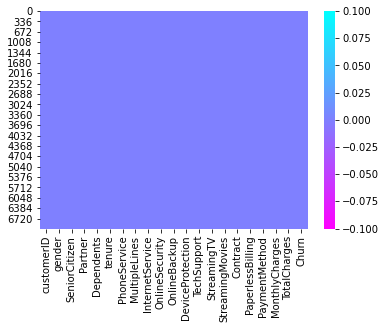

In [20]:
# Visualizing the null values with the help of a heatmap
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

This shows that there are no null values in the dataset anymore

In [21]:
# Viewing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


By info method we can get the information about the dataset which includes indexing type, column type, non-null values and memory usage. 

- Here we can see there are 3 types of data present
    - 2 integer type data
    - 2 float type data  
    - Remaining 17 columns have object data type

In [22]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


These are the unique values present in the dataset. 

Here CustomerID column has the unique ID given to each customer. We do not need this column for the predictions. Hence we can drop this column.

In [23]:
#Dropping CustomerID column
df.drop('customerID',axis=1,inplace=True)

In [24]:
# Checking the number of unique values of target column
df['Churn'].nunique()

2

In [25]:
# Checking the unique values of target column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

There are two categories present in the target column namely "No" and "Yes". We can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have churned from the company.

In [26]:
#Checking the count of each unique value in target column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# DATA VISUALIZATION

## Univariate Analysis

### Plotting categorical columns

No     5174
Yes    1869
Name: Churn, dtype: int64


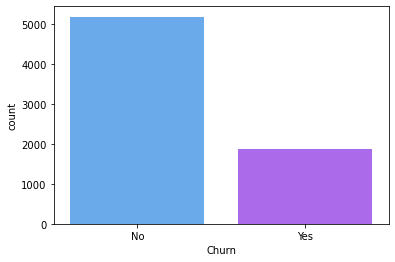

In [27]:
#visualize the count of churned customers
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette="cool")
plt.show()

# Observation
The count plot shows that the count of "No Churn" are high compared to the count of "Yes Churn". That is the number of customers who who retained with the company is more than those who left the company. This leads to class imbalance issue in the data, we need to fix this class imbalance in the further steps using oversampling method.

Male      3555
Female    3488
Name: gender, dtype: int64


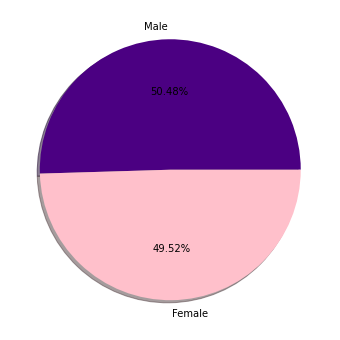

In [28]:
#Visualize the count of Gender
print(df['gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(6,6))
colors=["indigo","pink"]
ax.pie(df['gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

# Observation
The above plot shows that the total number of male and female customers is similar, where the count of male is 3555 which is slightly higher compared to count of female which has 3488 counts.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


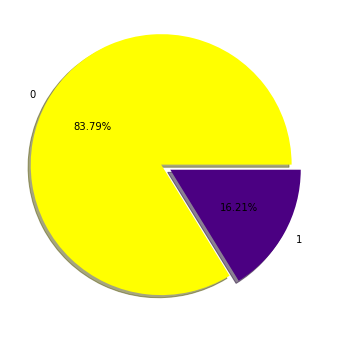

In [29]:
#visualize the count of Gender
print(df['SeniorCitizen'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["yellow","indigo"]
ax.pie(df['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0),colors=colors)
plt.show()

# Observation
In the above plot 0 represents the non senoir citizens and 1 represents the senior citizens. The count of 0(non-senior citizens) is high is higher than the count of 1(senior citizens). Around 83% of the customers are non-senior citizens and only 16% are senior citizens.

No     3641
Yes    3402
Name: Partner, dtype: int64


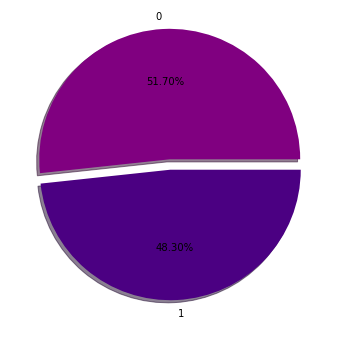

In [30]:
# visualizing how many customers have their partners
print(df["Partner"].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["purple","indigo"]
ax.pie(df['Partner'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.08,0),colors=colors)
plt.show()

# Observation
The count for partner details are almost similar and the customers who do not have partners are bit higher than those who have partners. 51% of the customers donot have partners while 48% of them had partners

No     4933
Yes    2110
Name: Dependents, dtype: int64


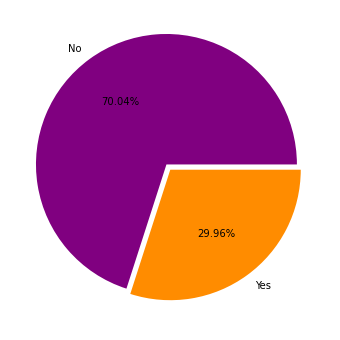

In [31]:
# visualize the count of Gender
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors=["purple","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0),colors=colors)
plt.show()

# Observation
The customers who have dependents are less in number than those who donot have dependents. Here around 70.04% of customers donot have dependents only 29.96% have dependents.

Yes    6361
No      682
Name: PhoneService, dtype: int64


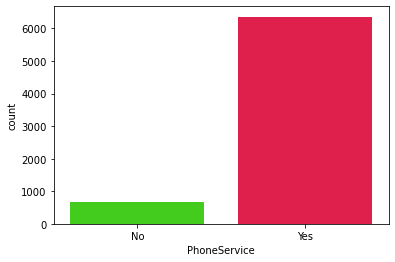

In [32]:
# visualizing how many customers have phone service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"],palette="prism")
plt.show()

From the above plot we can observe that the customers who have phone services are huge in numbers than those who do not have phone services.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


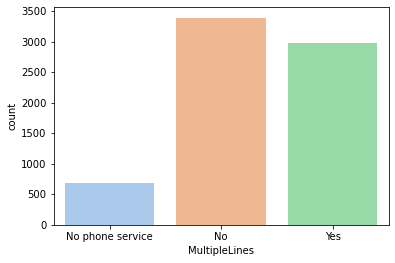

In [33]:
# visualizing count of multiple lines
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="pastel")
plt.show()

# Observation
The customers who have phone services from single line are higher in count compared to the customers having phone services from multiple lines. Also the customers who do not have phone services are very less data compared to others.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


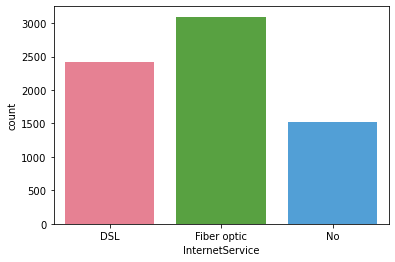

In [34]:
# visualizing how many customers have internet services
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="husl")
plt.show()

# Observation
Most of the customers have chosen to get Fiber optic internet service followed by DSL, but there are many customers who did not opt for an internet service.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


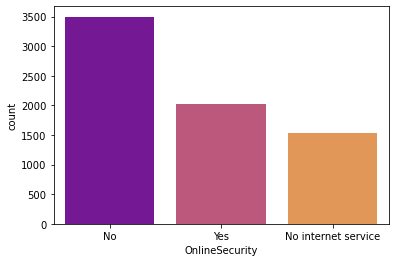

In [35]:
# visualizing how many customers have online security
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"],palette="plasma")
plt.show()

# Observation
Those customers who have opted for internet services needs online security. But from the above count plot we can observe that though majority of the customers have internet services, they do not use any online security. Only moderate number of people have online security. 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


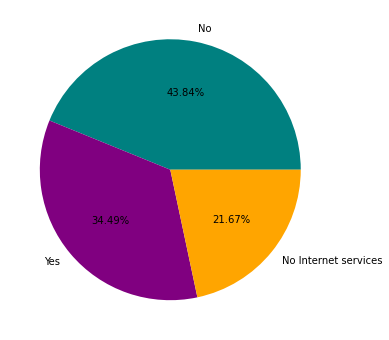

In [36]:
# visualizing how many customers have online backup
print(df['OnlineBackup'].value_counts())
labels='No','Yes',"No Internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["teal","purple","orange"]
ax.pie(df['OnlineBackup'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

# Observation
It is obvious that the customers who do not own internet services and online security, they do not need online backup usage. From the plot we can see that 43.84% of the total customers who have internet services do not have Online backup, who are the majority here. 34.49% of the customers who have internet services donot have any online backup. Also 21.67% of the customers do not have internet services, These are the minority here.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


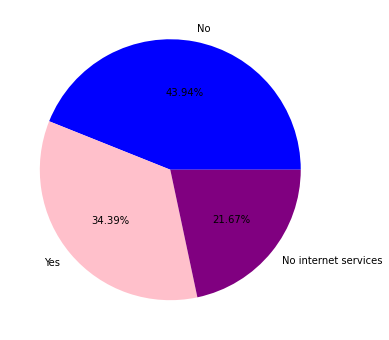

In [37]:
# visualizing how many customers have deviceprotection
print(df["DeviceProtection"].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["b","pink","purple"]
ax.pie(df['DeviceProtection'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=False,colors=colors)
plt.show()

# Observation
From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. And there are 21.67% of the total customers who do not have internet access.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


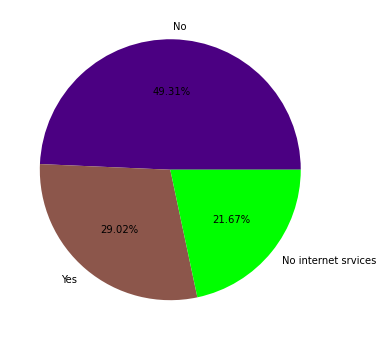

In [38]:
# visualizing how many customers have Techsupport 
print(df['TechSupport'].value_counts())
labels='No','Yes',"No internet srvices"
fig, ax = plt.subplots(figsize=(6,6))
colors=['indigo','tab:brown','lime']
ax.pie(df['TechSupport'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

# Observation
The customers who do not need any technical support are high in counts compared to the customers who need technical support. Around 49% of the people do not need any technical support and only 29% needs.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

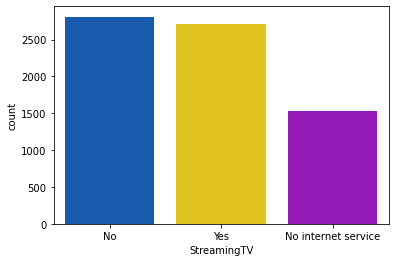

In [39]:
# visualizing how many customers have streamingtv
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="prism")
plt.show

# Observation
The customers who do not use streamingTV are slightly higher than the customers who do use StreamingTV. And the customers who do not own internet they do not have this service atall.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


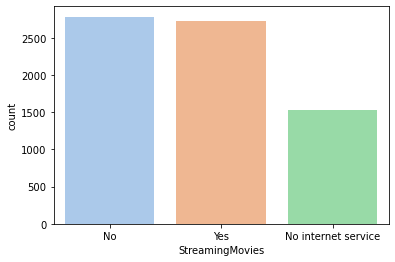

In [40]:
# visualizing how many customers have streamingmovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="pastel")
plt.show()

# Observation
This plot is almost similar to the above plot of streaming tv. The customers who do not Stream movies are slightly higher than the customers who Stream movies. And the customers who do not have internet services anyways donot have streaming movies service too.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


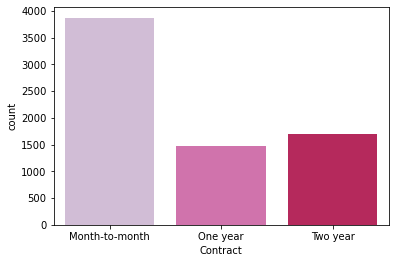

In [41]:
# visualizing how many customers have contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="PuRd")
plt.show()

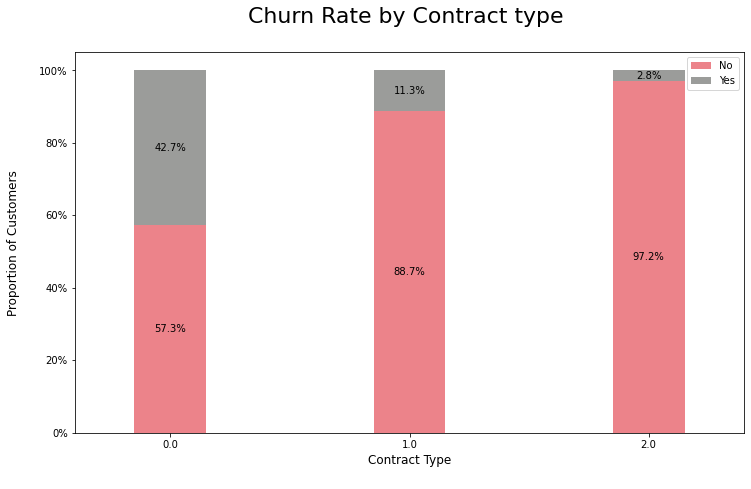

In [128]:
import matplotlib.ticker as mtick
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

# Observation
- Most of the customers prefer Month to Monthly contracts. When longer terms are considered more customers have opted for 2 years contracts than 1 year contracts.
- From the second plot we can observe that the customers who opted for monthly contracts have higher curn rates than the customers who have opted for long term contracts. 
- churn rate is least in the customers who opted for 2 year contract followed by 1 year contract

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


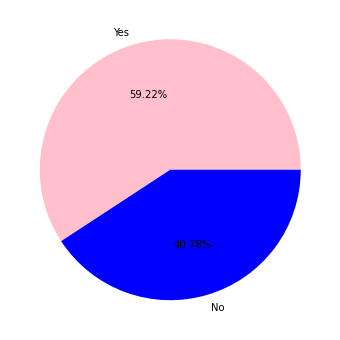

In [42]:
# visualizing how many customers have paymentmethod
print(df['PaperlessBilling'].value_counts())
labels='Yes','No'
fig, ax = plt.subplots(figsize=(6,6))
colors=["pink","b"]
ax.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False, colors=colors)
plt.show()


# Observation
Most of the customers prefer paperless billing and others do not prefer paperless billing, they may like to receive paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


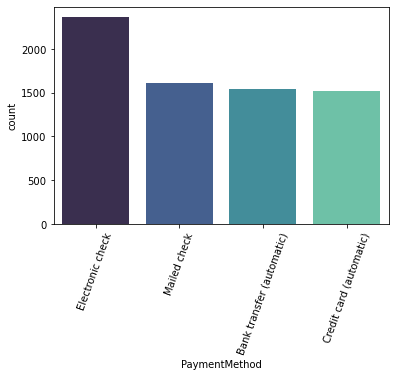

In [43]:
# visualizing how many customers have contract
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="mako")
plt.xticks(rotation=70)
plt.show()

# Observation
Most of the customers prefer Electronic check payment method and the customers followed by others. The customers who prefer Mailed Check, bank transfer and Credit card are almost similar in count.

### Plotting Numerical Columns

In [44]:
# Assigning a variable for all numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical_columns are:\n",numerical_col)

Numerical_columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# Observation
As discussed above, the senior citizen column has numerical data that has been converted from object type data... we have already plotted the count for this column so we can remove this from the list as this doesnot give proper distribution even though plotted.

In [45]:
#Removing senior citizen column from the numerical columns list by giving its index number
numerical_col.pop(0)

'SeniorCitizen'

We have Removed senior citizen column from the numerical columns list by giving its index number with pop method.

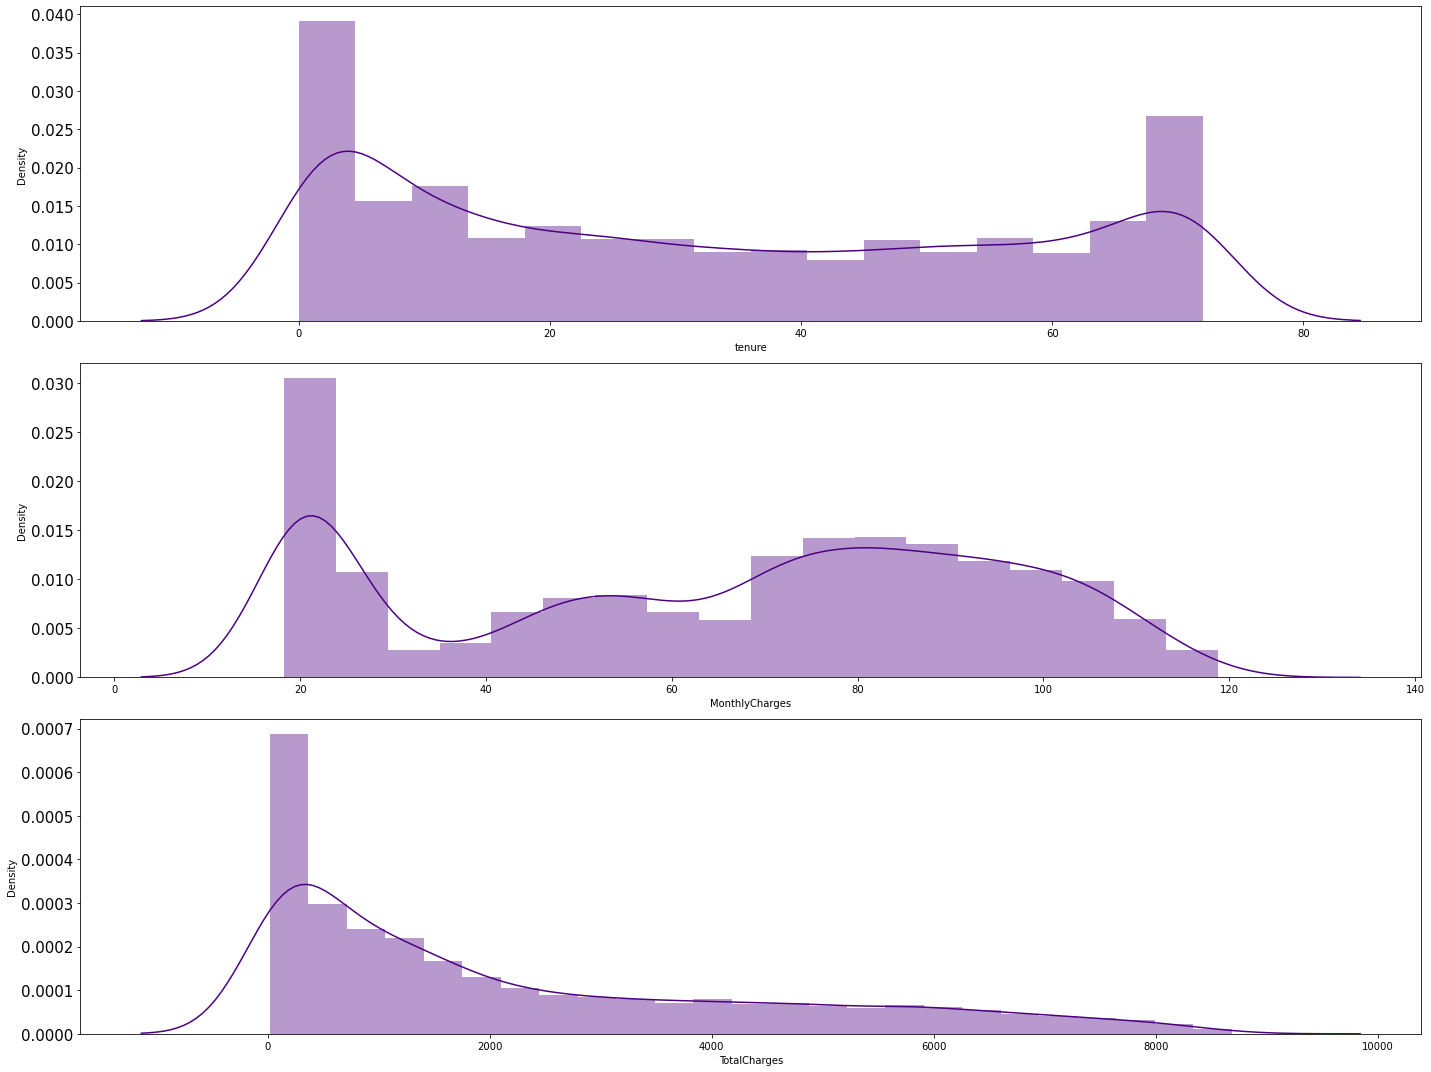

In [46]:
# let's check how the data has been distributed in remaining columns
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=3:
        ax=plt.subplot(3,1,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Observation
From the above distribution plots we can observe that
- There is skewness present in the data, the data in the column TotalCharges, it is skewed to right
- Other two columns tenure and MonthlyCharges do not have high skewness compared to total charges

## Bivariate Analysis

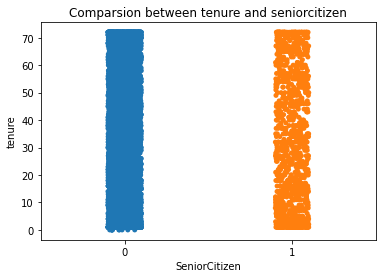

In [47]:
# comparing tenure and seniorcitizen
plt.title("Comparsion between tenure and seniorcitizen")
sns.stripplot(x= "SeniorCitizen",y="tenure",data = df)
plt.show()

# Observation
There is no significant difference between the features tenure & seniorcitizen, here both the features are in equal counts.

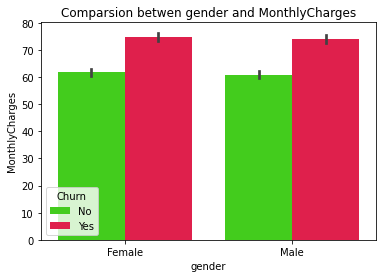

In [48]:
# comparing gender and monthlycharges
plt.title("Comparsion betwen gender and MonthlyCharges")
sns.barplot(x= "gender",y="MonthlyCharges", data = df,hue="Churn",palette="prism")
plt.show()

# Observation
- Both male and female customers with monthly charges above 60 have high chances of getting churned.
- Those customers who ahve monthly charges below 60 have less chance of churning out.
-  Also the number of both male and female customers is quite similar here.

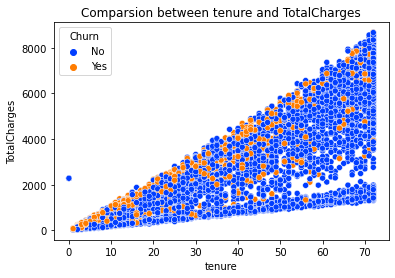

In [49]:
# comparing tenure and TotalCharges
plt.title("Comparsion between tenure and TotalCharges")
sns.scatterplot(x= "tenure",y= "TotalCharges", data = df,hue="Churn",palette="bright")
plt.show()

# Observation
- Here we can notice that Total charges and tenure are directly proportional to each other which potrays strong linear relation between the both.
- As the tenure increases, TotalCharges increases. 
- The lower side of tenure is densly packed which means, the customers opting for low tenure services have high chance of churn.
- As the tenure increase the density of customers churning out has decreased.

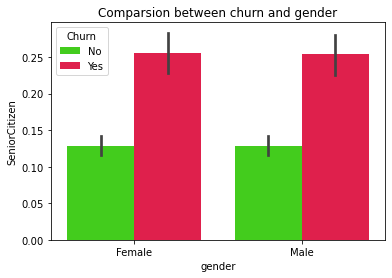

In [50]:
# comparing gender and seniorcitizen on the basis of churn
plt.title("Comparsion between churn and gender")
sns.barplot(x="gender",y="SeniorCitizen",data=df,palette="prism",hue="Churn")
plt.show()

# Observation
- There is no significant difference between the columns as both the genders are almost in 1:1 ratio
- The customers who are senior citizens in both the genders have high chance of churn compared to the customers who stay with the company.

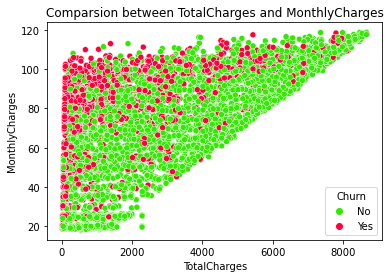

In [51]:
# comparing totalcharges and monthly charges
plt.title('Comparsion between TotalCharges and MonthlyCharges')
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue="Churn",palette="prism")
plt.show()

# Observation
- The customers with high monthly charges have high Total charges, which says monthly charges is directly proportional to the total charges.
- Also there is high chance of churn as the monthly charges are higher.
- The customers who churn are densely populated at higher monthly charges tahn lower monthly charges

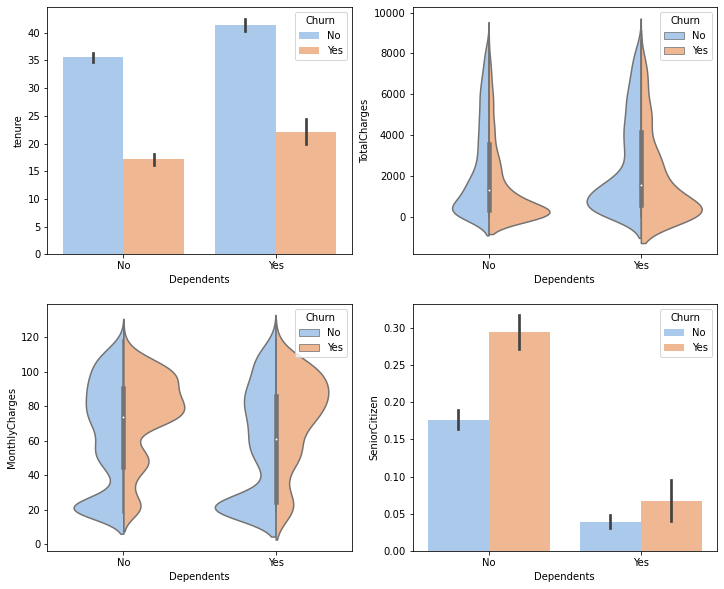

In [52]:
fig, axes=plt.subplots(2,2,figsize=(12,10))

# checking churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=df,palette="pastel",hue="Churn")

# checking churn level in totalcharges
sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=df,palette="pastel",hue="Churn",split=True)

# checking churn level in  monthlycharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[1,0],data=df,palette="pastel",hue="Churn",split=True)

# checking churn level in seniorcitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,1],data=df,palette="pastel",hue="Churn")
plt.show()

# Observation
- The customers who have dependents have high tenure.
- The customers who have dependents have higher churn rate compared to those who donot have dependents.
- The customers who have dependents have higher total charges than who donot have dependents.
- The customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and customers having monthly charges around 20 have lower churn rate.
- If the customer is a senior citizen and have no dependents then there is a higher chance of getting churned.

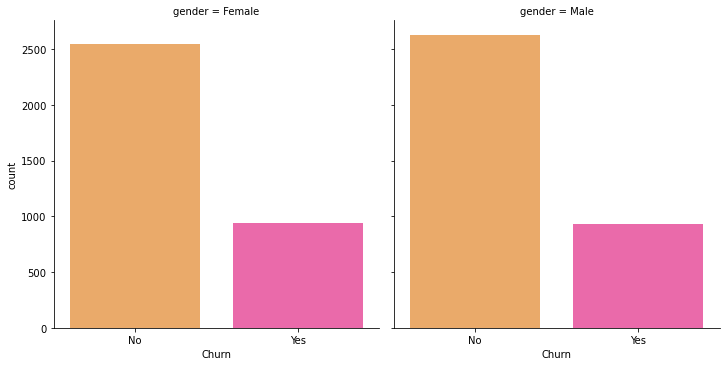

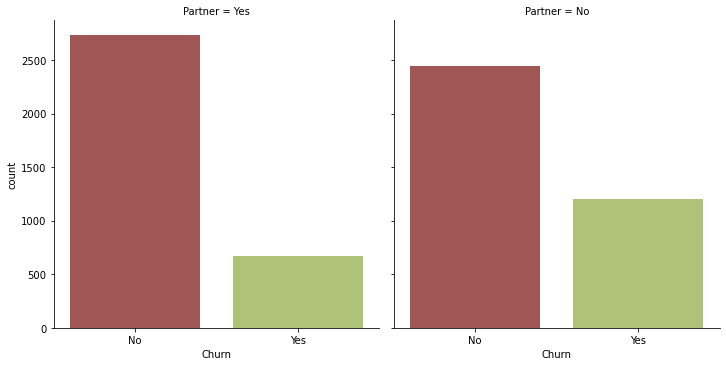

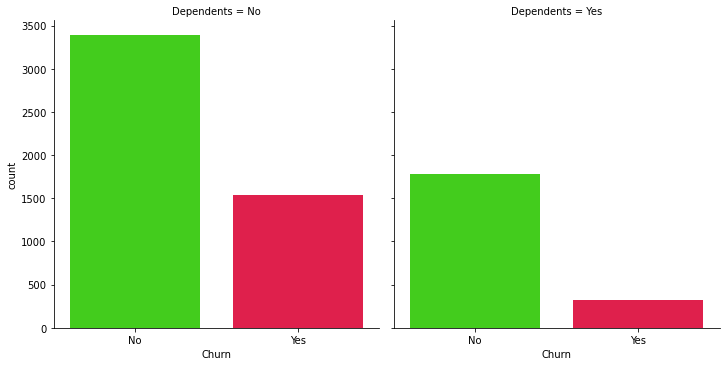

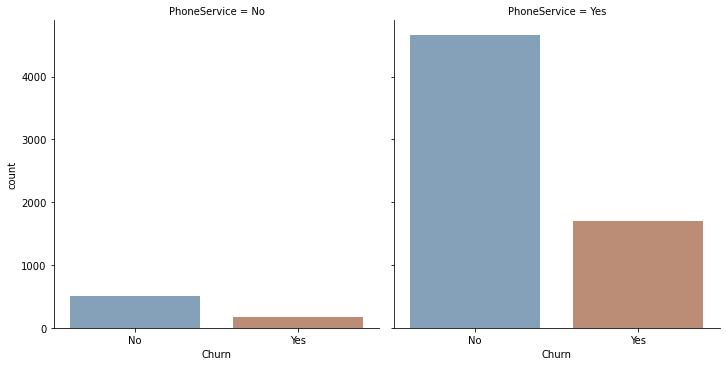

In [53]:
#checking churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# checking churn level and gender
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

#checking churn level in dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="prism",kind="count")
            
#checking churn level in phoneservice
sns.catplot(x='Churn',col='PhoneService',data=df,palette="twilight_shifted",kind="count")
plt.show()

# Observation
- In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.
- In the second plot we can notice the customers having partners have low churn rate than the customers who donot have the partners
- In the second plot we can see the customers having dependents have high churn rate compared to the customers not having dependents.
- In the last plot we can observe that the customers who do not have phone service have high churn rate compared to the customers who have phone service.

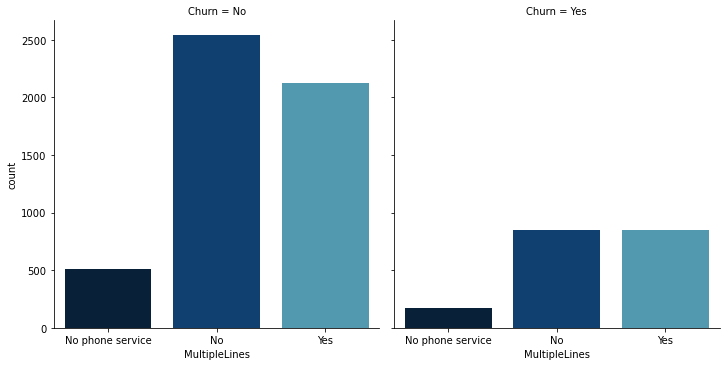

In [54]:
#checking churn level and multiplelines
sns.catplot(x='MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

# Observation
- The customers who have phone services from single line and multiple lines are equal in churn rate and higher than those who donot have phone services
- Also there are very less number of customers who do not have phone services in both churned and not churned categories
-  The customers who have phone services from single line have high retention rate compared to the customers having phone services from multiple lines 

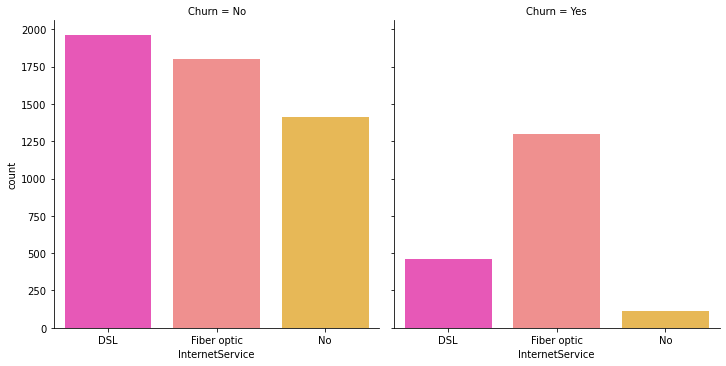

In [55]:
#checking churn level in internetservice
sns.catplot(x='InternetService',col='Churn',palette="spring",kind="count",data=df)
plt.show()

# Observation
- The ratio of churn is high with the customers who prefer Fiber optic internet services compared to other services
- And the customers who own DSL service have very less churn rate compared to fiber optic intennet service.
- The customers who have DSL service are having high retention than other customers who opted for fiber optic internet service and no internet service

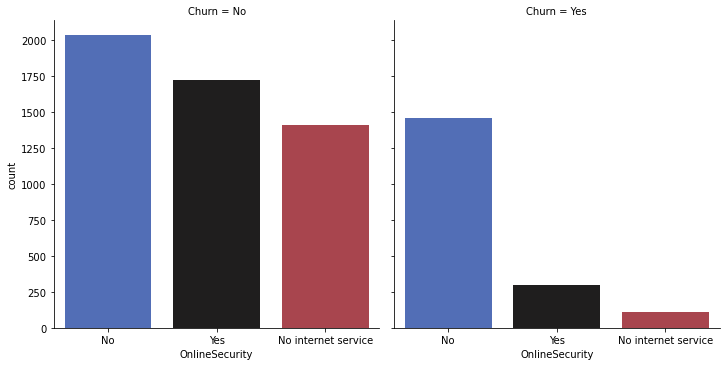

In [56]:
#checking churn level in onlinesecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()

# Observation
The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned than the customers who have online security

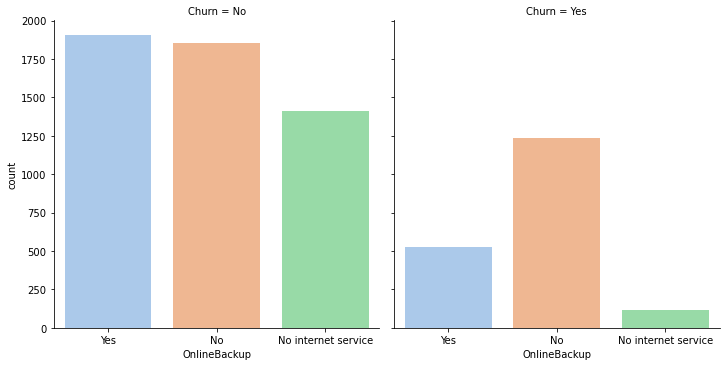

In [57]:
# checking churn level in onlinebackup
sns.catplot(x='OnlineBackup',col='Churn',palette="pastel",kind="count",data=df)
plt.show()

# Observation
It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services have high churn rate compared to those who have Online backup

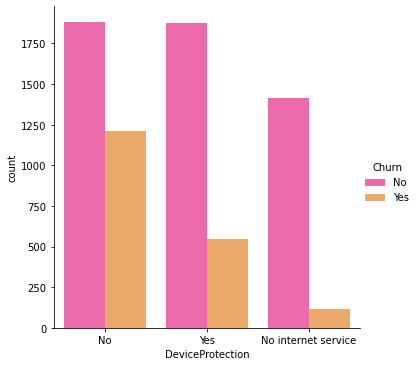

In [58]:
# checking churn level in deviceprotection
sns.catplot(x='DeviceProtection',hue='Churn',palette="spring",kind="count",data=df)
plt.show()

# Observation
- The customers who do not own any Device protection have very high churn rate compared to others.
- Most of he customers who have device protection have retained and only around 25% of them have churned

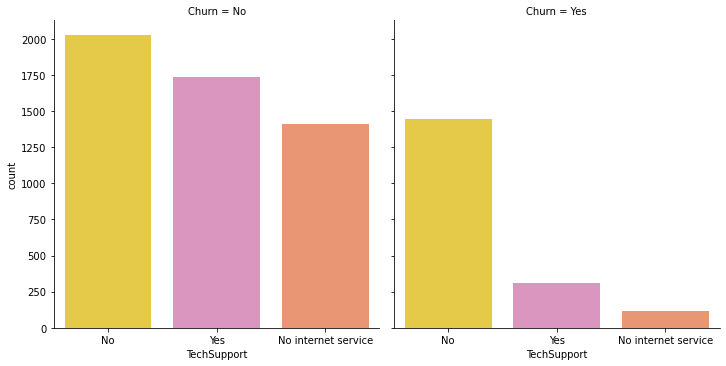

In [59]:
# checking churn level in techsupport
sns.catplot(x='TechSupport',col='Churn',palette="Set2_r",kind="count",data=df)
plt.show()

# Observation
- Here we can clearly see that the customers who do not have any techsupport have high churn rate than those with the tech support
- The customers who donot have tech support are also high in number that have retained which is followed by those who have tech support and no internet service 

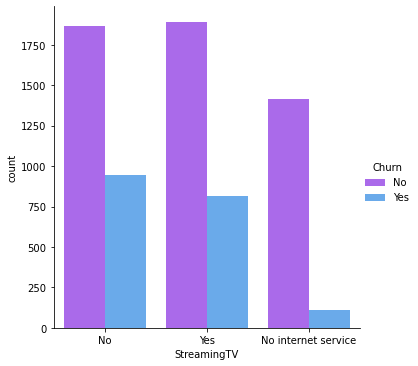

In [60]:
#checking churn level in streamingTv
sns.catplot(x='StreamingTV',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

# Observation
- The churn level is high in those who donot have any streaming TV than those who stream TV
- The retained have high numbers for the customers who have streaming TV

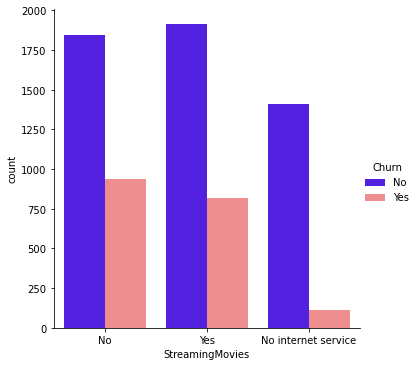

In [61]:
# checking churn level in streamingmovies
sns.catplot(x='StreamingMovies',hue='Churn',palette='gnuplot2',kind="count",data=df)
plt.show()

# Observation
- The customers who are retained in the company donot Stream Movies in their devices 
- The customers who donot stream movies in their devices have high higher churn rate than others
- And the churn rate is low when the customer do not have internet services.

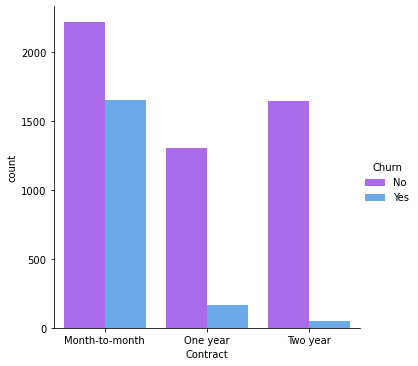

In [62]:
#checking churn level in contract
sns.catplot(x='Contract',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()

# Observation
- The customers who have month to month contract are likely to churn than those with long term contracts.
- Also the retention is even higher than churn in the month to month contract customers than others followed by 2 year contract customers.

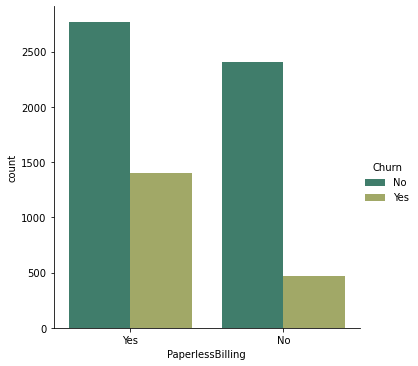

In [63]:
# checking churn level in paperlessBillibg
sns.catplot(x='PaperlessBilling',hue='Churn',palette="gist_earth",kind="count",data=df)
plt.show()

# Observation
- The customers who prefer paperless billing have higher churn rate.
- Also the customers prefer paperless billing have higher retention than those who donot

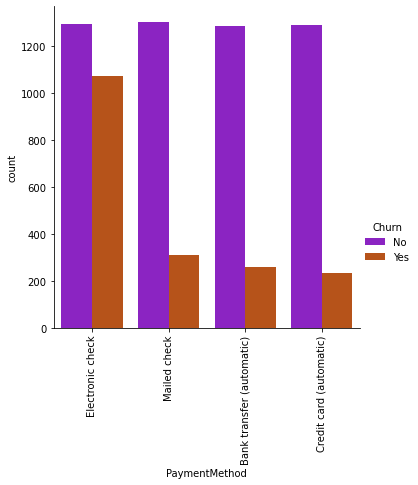

In [64]:
# checking churn level in paymentmethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="gnuplot",kind="count",data=df)
plt.xticks(rotation=90)
plt.show()

# Observation
The customers who prefer Electronic check have high churn rate than others where as the customers retained in the company are almost equal for all the four methods of payment

## Multivariate Analysis

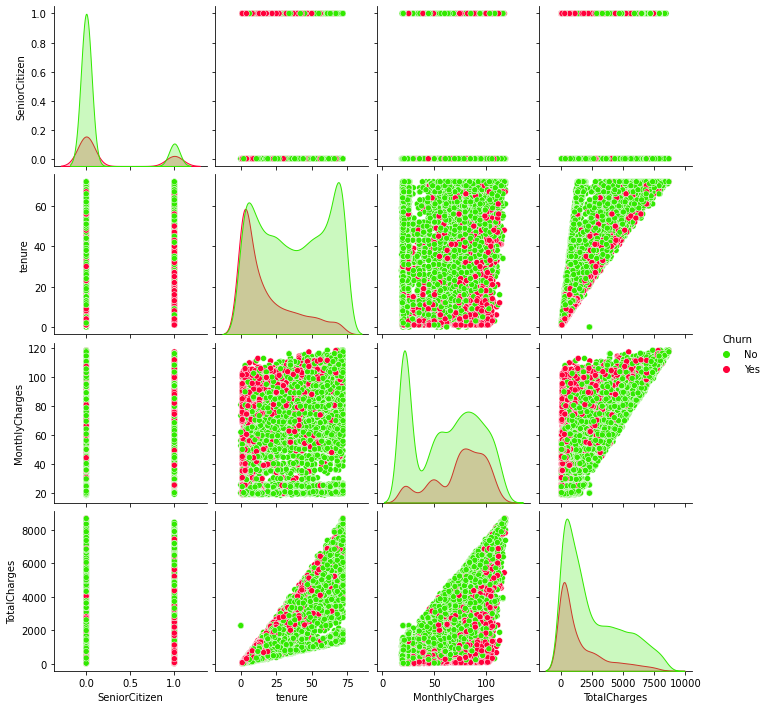

In [65]:
sns.pairplot(df,hue="Churn",palette="prism")
plt.show()

# Observation
- The pairplot gives the pairwise relation between the features on the basis of the target "Churn". 
- In the top left diagonal we can notice the distribution plots.
- The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.
- There are minimal to no outliers in any of the columns but let's plot box plot to confirm the same.

# Label Encoding

In [66]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [67]:
# statistical summary of numerical columns
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# Observations
- After encoding the categorical columns we are able to see the statistical summary of all the columns using describe() method. Else the summary of the numerical columns is displayed and categorical columns doesnt appear.
-  This describe method descrbes the count, mean, standard deviation, min, IQR and max values of all the columns.
- The counts of all the columns are same that means no null values in the dataset. 
- The mean of the following columns is greater than the median which implies the distribution is skewed to the right
    - senior citizen
    - partner
    - dependents
    - tenure
    - contract
    - totalcharges
    - churn
    
- The median of the following columns is greater than the mean which implies the distribution is skewed to the left
    - gender
    - phone service
    - Multiple lines
    - internet service
    - online security
    - online backup
    - device protection
    - techsupport
    - streaming tv
    - streamingmovies
    - paperlessbilling
    - payment method
    - monthly charges

- There is a huge difference betwen the 3rd quantile and the maximum in the following columns which implies there is a high chance for presence of outliers 
    - Total charges
    - monthly charges
    - tenure

We have to eliminate the outliers from the dataset in the above columns to have better performance of the model

## Identifying the outliers

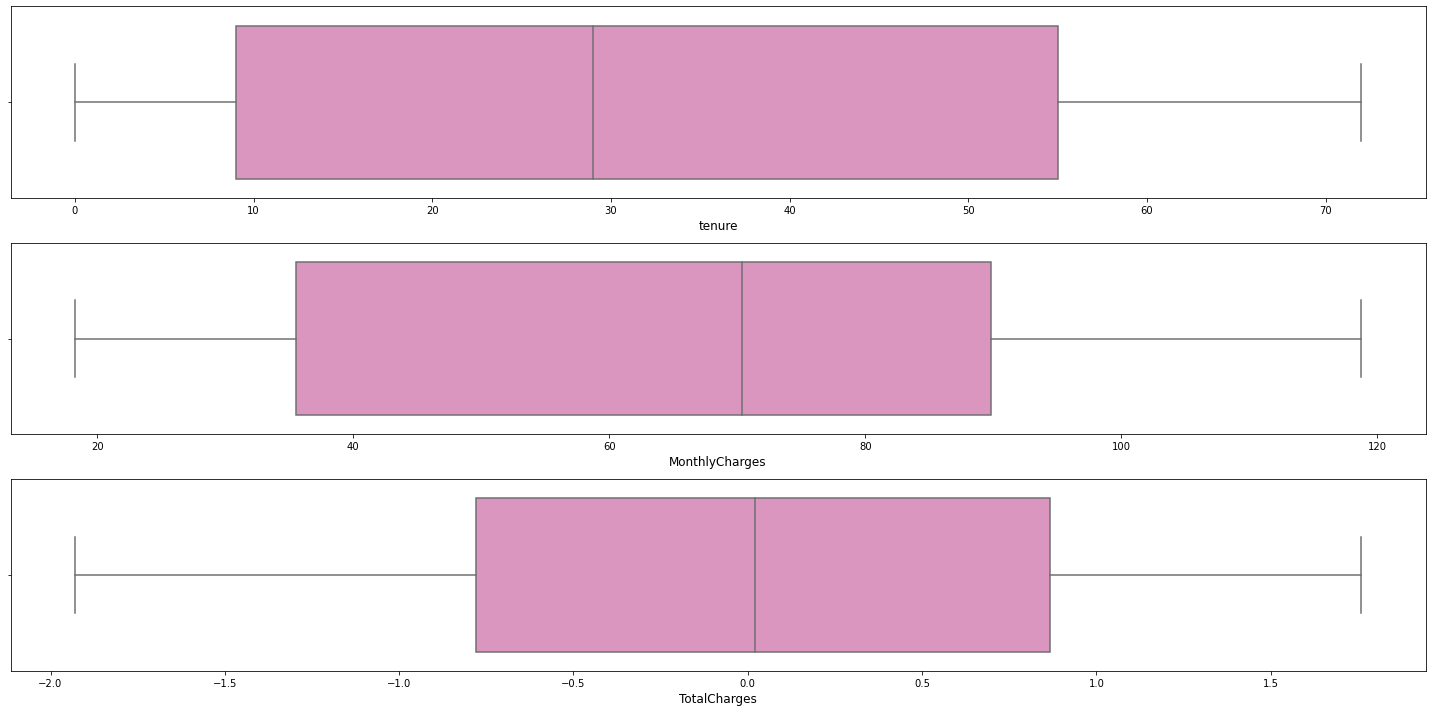

In [138]:
# let's check the outliers by plotting bbox plot

plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=3:
        ax=plt.subplot(3,1,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=12)
        plt.yticks(rotation=0,size=12)
    plotnumber+=1
    plt.tight_layout()

# Observation
From the above boxplots we can say that none of the columns show presence of outliers.
So need not treat for outliers

# Checking for skewness

In [69]:
# checking for skewness in numerical columns
df[numerical_col].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

# Observation
The column TotalCharges has skewness in the data. Since TotalCharges is continuous in nature, lets use PowerTransformer method to remove skewness.

## Removing skewness

In [70]:
from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
    
#applying Power Transformation method for this particular column
df['TotalCharges'] = scaler.fit_transform(df['TotalCharges'].values.reshape(-1,1)) 

we have removed the skewness using PowerTransformer method.

In [71]:
#checking skewness again
df[numerical_col].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

We can see the skewness has been reduced in TotalCharges column.

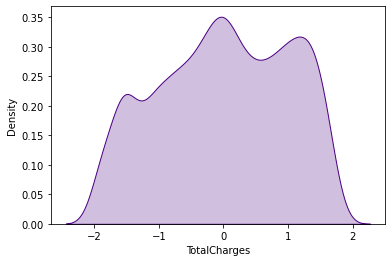

In [72]:
# let's visualize how the data has been distributed in toatalchharges after removing skewness
sns.distplot(df["TotalCharges"],color="indigo",kde_kws={"shade": True},hist=False)
plt.show()

The looks almost normal and skewness is removed.

# Correlation

In [73]:
#Assigning a variable and checking the correlatipon between features and the target
cor =df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

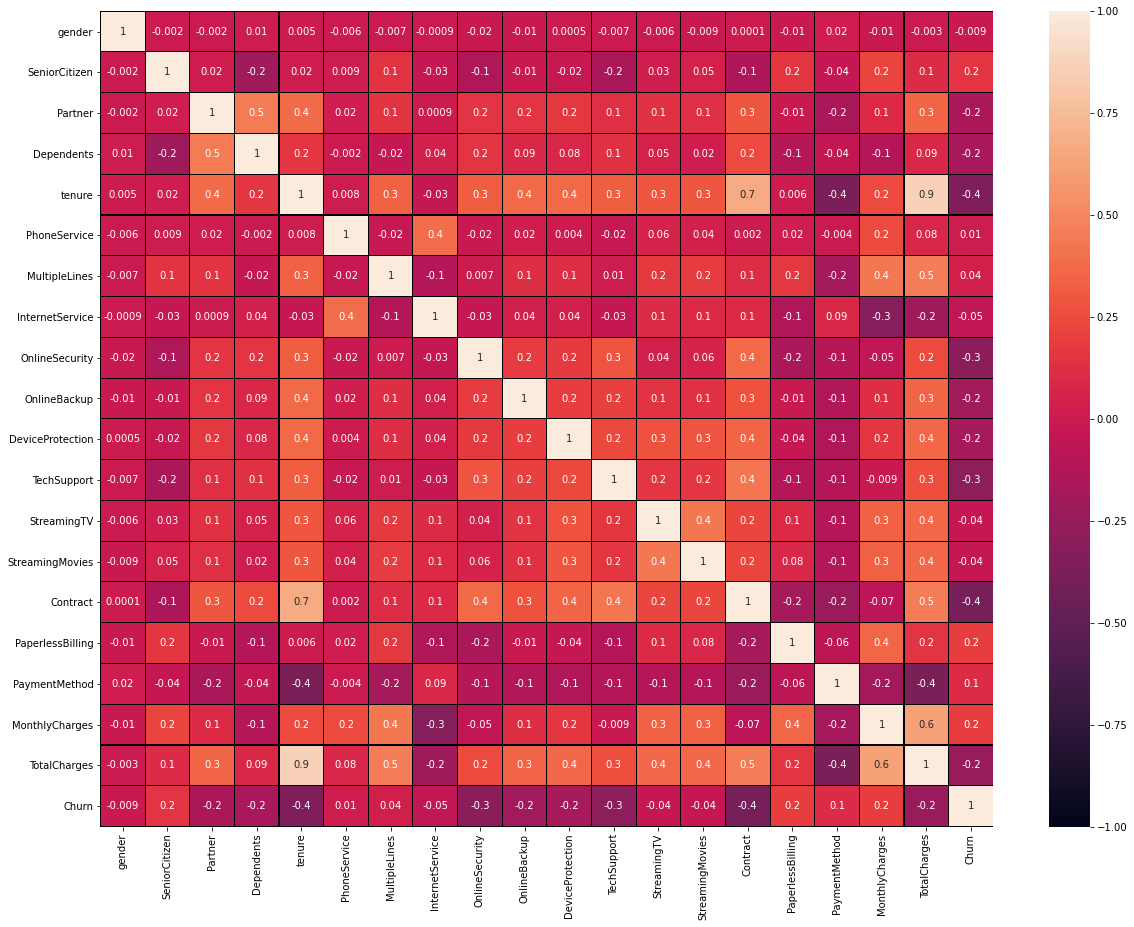

In [74]:
#visualizing the correlation matrix by plotting heat map
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1, vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10})
plt.yticks(rotation=0);

# Observations

- This heatmap shows the correlation matrix by visualizing the data. 
- We can observe the relation between feature to feature and feature to label.
- This heat map contains both positive and negative correlation.
- There are no features that are highly positively correlated with the target.
- The following columns columns have positive collrelation with the label Churn 
    - MonthlyCharges
    - PaperlessBilling
    - SeniorCitizen
    - PaymentMethod 
    - phone service
    - multiple lines

- The label is negatively correlated with the following columns
    - Contract
    - tenure
    - OnlineSecurity
    - TechSupport
    - TotalCharges
    - DeviceProtection
    - OnlineBackup
    - Partner
    - Dependents
    - internet service
    - streaming tv
    - streaming movies
    - 
- Also the column gender has very less correlation with the label, we can drop it if necessary.
- The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [75]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.237089
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positive(+) and negative(-) correlated features with the target here

## Visualizing the correlation between label and features using barplot

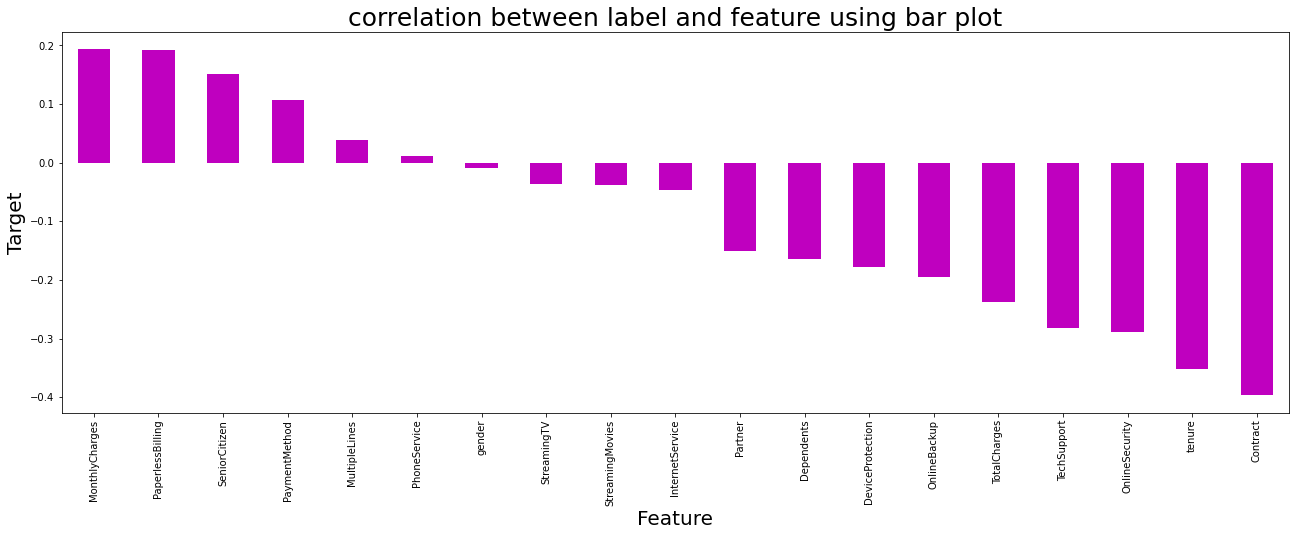

In [76]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('correlation between label and feature using bar plot',fontsize=25)
plt.show()

# Observations
- From the above bar plot we can notice the positive(+) and negative(-) correlation between the target and the features. 
- Here the features gender and PhoneService have very less correlation with the column.

# Decoupling the master set as x and y

In [77]:
x= df.drop("Churn",axis=1)
y= df["Churn"]

In [78]:
#dimension  of x
x.shape

(7043, 19)

In [79]:
#dimension of y
y.shape

(7043,)

# Feature Scaling using Standard Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.295688
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.567097
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.859899
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.922968


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

In the heat map we have found some features having high correlation between each other which means multicollinearity problem so let's check the VIF value to solve multicollinearity problem.

# Checking Variance Inflation Factor(VIF)

In [82]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.001684,gender
1,1.149730,SeniorCitizen
2,1.463075,Partner
3,1.384396,Dependents
4,10.690306,tenure
5,1.622399,PhoneService
6,1.397403,MultipleLines
7,1.866643,InternetService
8,1.252550,OnlineSecurity
9,1.188767,OnlineBackup


By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [83]:
#dropping totalcharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [84]:
#Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

#let's check the values
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


All the columns have VIF less than 10 which means the data is free from multicollinearity problem. So we can move further to build our machine learning models.

In [85]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can observe the data is not balanced, since it is classification problem we will balance the data using oversampling method.

# Oversampling

In [86]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [87]:
# checking value count oftarget column
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

We have used oversampling method to balance the data and checked the value count.

Since the highest count of Churn column is 5174 so the data is balanced by oversampling all the categories to the count 5174.
Finally the data is also balanced then we can build our machine leaning classification models.


# Model training

## Finding best random state

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Random_state",maxRS)

Best accuracy is  0.8657004830917875 on Random_state 102


We have got the best random state and maximum accuracy

# Creating Train_test split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

we have created a new train test split using Random State.

# Classification Algorithms

In [90]:
### importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Random Forest Classifier

In [91]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8666666666666667
[[1351  219]
 [ 195 1340]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1570
         1.0       0.86      0.87      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



Here we have created the Random Forest Classifier model and getting the accuracy for this model as 86.66%.

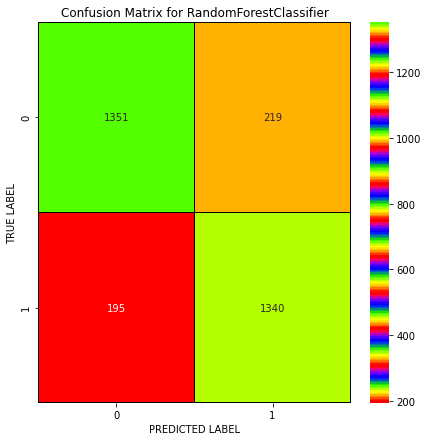

In [93]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="prism",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

# Logistic Regression

In [94]:
# Checking accuracy for Logistic Regression Classifier

LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7809983896940419
[[1182  388]
 [ 292 1243]]
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78      1570
         1.0       0.76      0.81      0.79      1535

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



We have created Logistic Regression model which is giving the accuracy 78.09%.

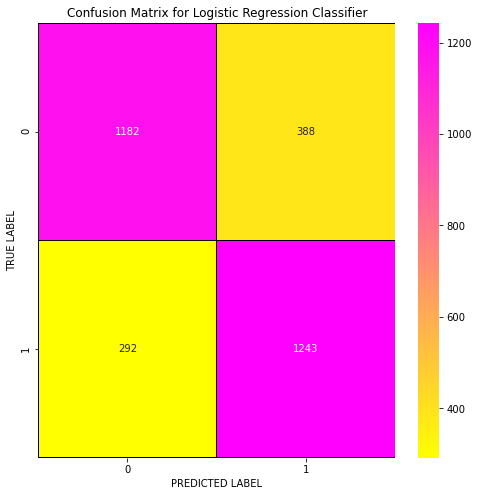

In [96]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

# Support Vector Machine Classifier

In [97]:
# checking accuracy for support vector machine classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8161030595813205
[[1215  355]
 [ 216 1319]]
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81      1570
         1.0       0.79      0.86      0.82      1535

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



Created SVC model and it is giving the accuracy as 81.86%.

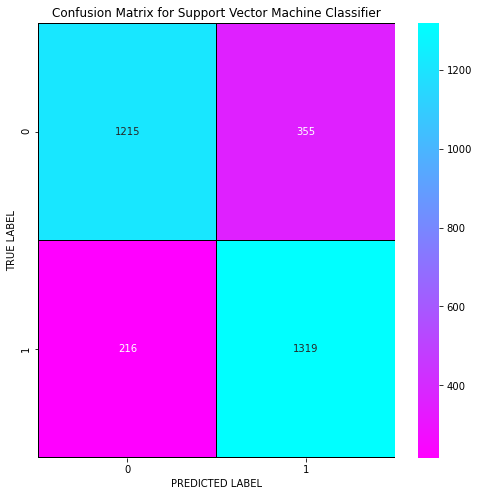

In [98]:
# Lets plot confusion matrix for Support Vector Machine Classifier

cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

# Gradient Boosting Classifier

In [99]:
# Checking accuracy for Gradient Boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.851207729468599
[[1295  275]
 [ 187 1348]]
              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85      1570
         1.0       0.83      0.88      0.85      1535

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



We have created Gradient Boosting Classifier and the accuracy is 85.12%.

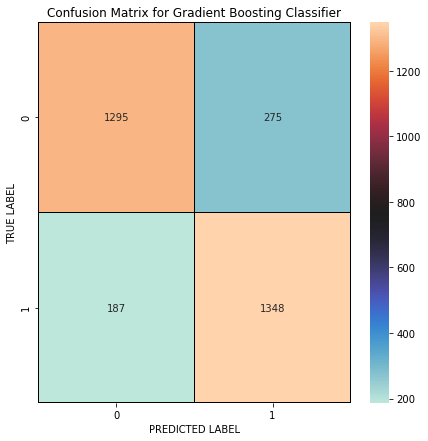

In [100]:
# Lets plot confusion matrix for Gradient Boosting Classifier

cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="icefire",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True val

# Extra Trees Classifier

In [101]:
# Checking accuracy for ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)

# Prediction
predXT = XT.predict(x_test)

print(accuracy_score(y_test, predXT))
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

0.8676328502415459
[[1346  224]
 [ 187 1348]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1570
         1.0       0.86      0.88      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



Created ExtraTrees Classifier model and getting accuracy for this model as 86.76%.

<function matplotlib.pyplot.show(close=None, block=None)>

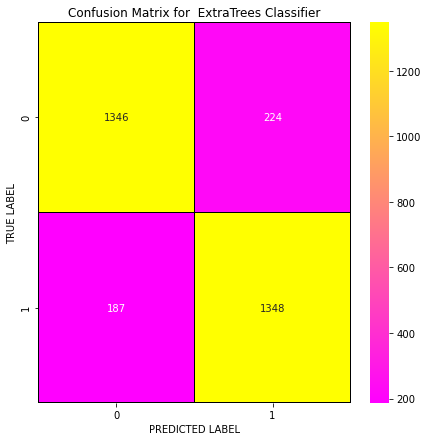

In [102]:
# Lets plot confusion matrix for  ExtraTreesClassifier

cm = confusion_matrix(y_test,predXT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

# XGB Classifier

In [103]:
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

predXGB=XGB.predict(x_test)

print(accuracy_score(y_test, predXGB))
print(confusion_matrix(y_test, predXGB))
print(classification_report(y_test,predXGB))

0.863768115942029
[[1355  215]
 [ 208 1327]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1570
         1.0       0.86      0.86      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



We have created XGB classifier model and getting the accuracy for this model as 86.37%

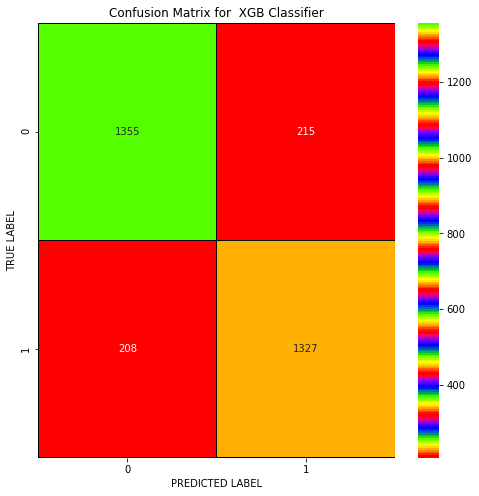

In [105]:
# Lets plot confusion matrix for  XGBClassifier

cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="prism",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

# Cross Validation Score

In [106]:
#Importing library
from sklearn.model_selection import cross_val_score

In [107]:
# cv score for random forest classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8496430631148095


In [108]:
# cv score for logistic regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.7758042229086842


In [109]:
# cv score for support vector machine classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8038318121429056


In [110]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.834953383627181


In [111]:
# cv score for Extra Trees Classifier
print(cross_val_score(XT,x,y,cv=5).mean())

0.8631693996726464


In [112]:
# cv score for XGB Classifier
print(cross_val_score(XGB,x,y,cv=5).mean())

0.8375674495602208


above are all the cross validation score or the models


The difference between accuracy score and cross validation score for the models used


Random Forest Classifier = 1.71%
Logistic Regression = 0.59%
SVC = 1.23%
Gradient Boosting Classifier = 1.63%
ExtraTrees Classifier = 0.45%
XGB Classifier = 2.62%


From the difference between the accuracy score and the cross validation score we can conclude that ExtraTrees Classifer as our best fitting model whch is giving very less difference compare to other models.

# Hyper Parameter Tuning

In [113]:
# ExtraTrees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

These are the parameters for Extra Trees classifier.

In [114]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

Running GridSearchCV for Extra Trees Classifier.

In [115]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [116]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

These are the best parameters values that we have got for Extra Trees classifier.

In [117]:
FinalModel = ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.27858293075684


The accuracy of best model increased after tuning and giving 87.27% which is very good.

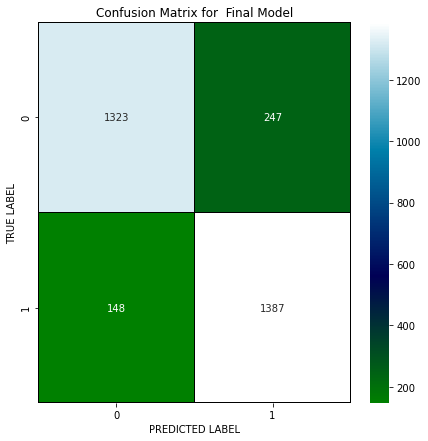

In [118]:
# Lets plot confusion matrix for  FinalModel

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

With the help of confusion matrix we can able to see actual and predicted values.

# Plotting ROC and compare AUC for all the models used

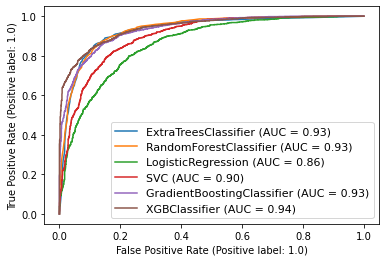

In [119]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(XT,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see the Area under curve for each model used here.

# Plotting ROC and Compare AUC for the best model

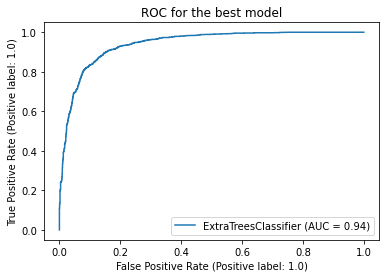

In [120]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 94%.

# Saving The Model

In [121]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"Customer_Churn_Model.pkl")

['Customer_Churn_Model.pkl']

We have saved our model using joblib library.

# Predicting the saved model

In [122]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Customer_Churn_Model.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 0., ..., 1., 1., 0.])

These are the predicted churned values of the customers.

In [123]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3100,1.0,1.0
3101,1.0,0.0
3102,1.0,1.0
3103,1.0,1.0


Both actual and predicted values are almost same.

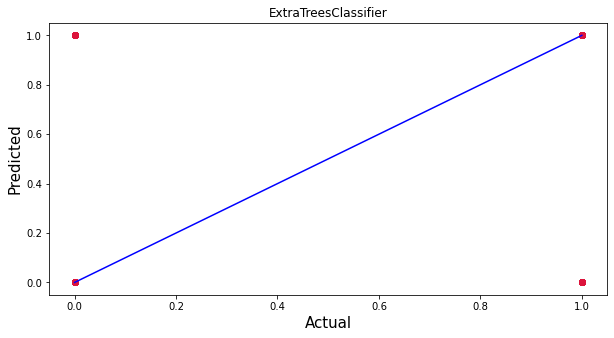

In [124]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesClassifier")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.